In [9]:
from utils import *
from TS import TabuSearch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from colors import colores
import functools

# Leer grafo

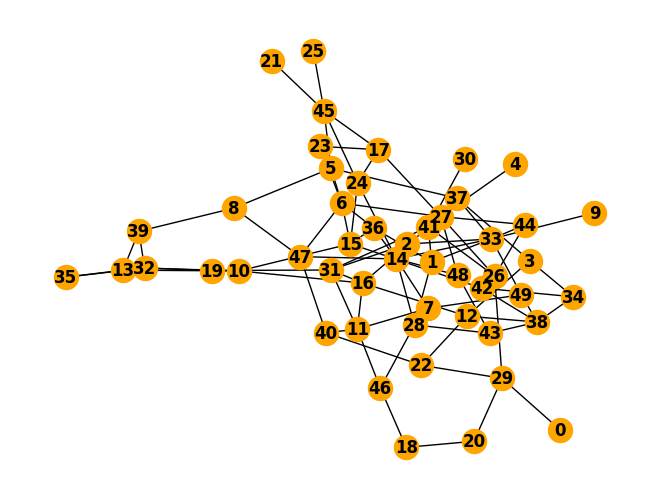

In [26]:
import csv
graph = []
with open('50nodos.csv', 'r', newline='') as file:
    myreader = csv.reader(file, delimiter=',')
    for row in myreader:
        # Convierte cada elemento de la fila en un entero
        int_row = [int(cell) for cell in row]
        graph.append(int_row)
graph = np.array(graph)
G = nx.from_numpy_array(graph)
nx.draw(G, with_labels=True, node_color='orange', font_weight='bold')
plt.show()

# Funcion de Costo

In [11]:

def graph_coloring(solucion, graph):
	"""graph_coloring Función Objetivo para el problema de Graph Coloring

	Parameters
	----------
	solucion : list[int]
		La solución a evaluar codificada de forma combinatoria. Es de tamaño neces
	graph : networkx.classes.graph.Graph
		Es la matriz de adyacencias del grafo a analizar

	Returns
	-------
	int
		Retorna el costo de la función
	"""
	ncolores=len(set(solucion))
	conflicts = 0
	for u, v in graph.edges():
		if solucion[u] == solucion[v]:
			conflicts += 1
	return conflicts + ncolores

fn = functools.partial(graph_coloring,graph =G)

# Experimento 1

In [12]:
first_solution = create_first_solution("combination", 50)

In [13]:

parametros = {
    "first_point":first_solution,
    "tabu_list_size":20,
    "number_of_points": 200,
    "diversification_type": "static",
	"diversification_size": 100,
    "stopping_criteria_type":"nochangebest",
    "max_nochange_best": 200,
    "long_term_memory_reset" : True,
    "problem_type": "COP",
	"min_or_max": "min",
    "codification": "combination"
}

In [14]:
ts = TabuSearch(**parametros)

In [15]:
colors = ts.fit(fn)

 iterations 3 | call_functions 801 | Best: 28.00 | actual_sol: 28.00

 iterations 401 | call_functions 80201 | Best: 8.00 | actual_sol: 8.0000

[33 29 15  3 17 15 17 50  3 33 22 22 50 15  3 50  3 33 17 50  3 33 33 35
 29 15 50 29 22 15 22 17 17 50 15 29 22 35 29 35 15 15  3  3 15  3  3 35
 33 22]


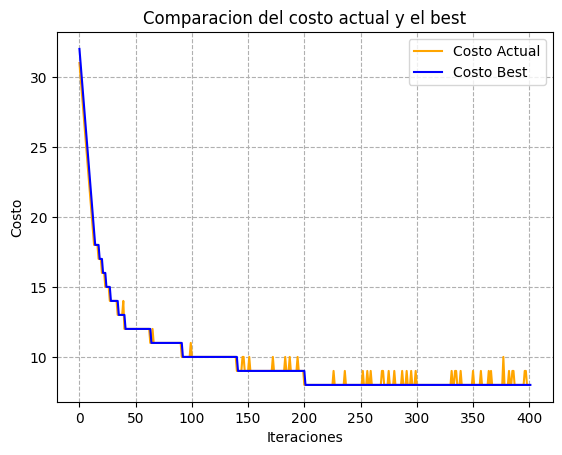

In [16]:
print(colors)

plt.plot(range(len(ts._cost_actual)), [x for x in ts._cost_actual ], color ='orange', label ="Costo Actual")
plt.plot(range(len(ts._cost_best)), [x for x in ts._cost_best ], color ='blue', label ="Costo Best")
plt.grid(True, linestyle='dashed')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Comparacion del costo actual y el best')
plt.legend()
plt.show()



# Prueba 1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


16425 Epoch | Equilibrium 15 | Temperature 0.01 | Cost function: 4  | Aceptance : 0.0003

Tiempo de ejecución: 00:00:13
[ 2  4 10  2 10 10  4  1  1  2]


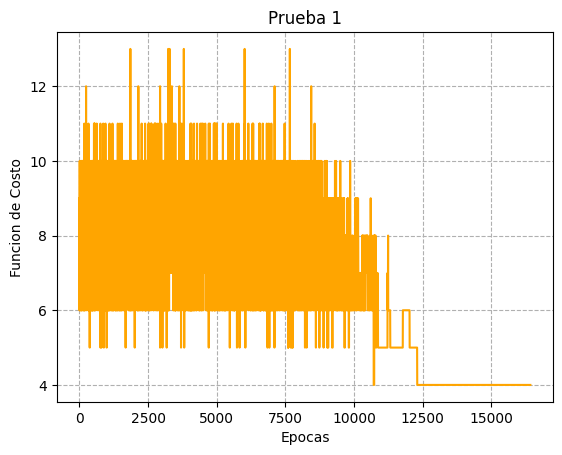

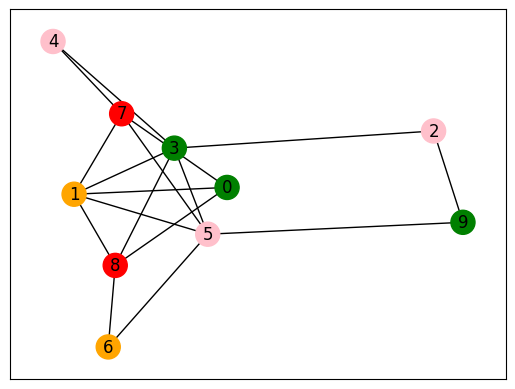

In [ ]:
colors = sa.fit(fn)
print(colors)
plt.plot(range(len(sa.cost_)), [x for x in sa.cost_ ], color ='orange')

plt.title('Prueba 1')
plt.xlabel('Epocas')  # Agrega el nombre al eje X
plt.ylabel('Funcion de Costo') 
plt.grid(True, linestyle='dashed')
plt.show()

colors = [colores[numero] for numero in colors]
nx.draw_networkx(G, node_color=list(colors), with_labels=True)
plt.show()